Epoch 0, Loss: 1.2961
Epoch 500, Loss: 0.3172
Epoch 1000, Loss: 0.3126
Epoch 1500, Loss: 0.3048
Epoch 2000, Loss: 0.2959
Epoch 2500, Loss: 0.2879
Epoch 3000, Loss: 0.2808
Epoch 3500, Loss: 0.2733
Epoch 4000, Loss: 0.2450
Epoch 4500, Loss: 0.1756
✅ Gradient check passed!


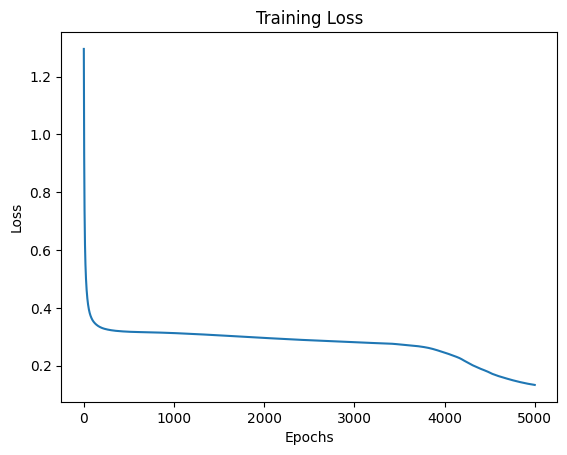

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


# Dataset

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)


# Activations

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_grad(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_grad(z):
    return (z > 0).astype(float)


# Parameter Initialization



def initialize_parameters(input_dim, hidden_dim, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2. / input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2. / hidden_dim)
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2


# Forward Propagation

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache


# Loss

def compute_loss(y, y_hat):
    m = y.shape[0]
    return - (1/m) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))


# Backward Propagation

def backward_propagation(X, y, W1, b1, W2, b2, cache):
    Z1, A1, Z2, A2 = cache
    m = X.shape[0]
    
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_grad(Z1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads


# Update Parameters

def update_parameters(W1, b1, W2, b2, grads, lr=0.1):
    W1 -= lr * grads["dW1"]
    b1 -= lr * grads["db1"]
    W2 -= lr * grads["dW2"]
    b2 -= lr * grads["db2"]
    return W1, b1, W2, b2


# Gradient Checking

def gradient_checking(X, y, W1, b1, W2, b2, epsilon=1e-7):
    # Forward + Backward
    y_hat, cache = forward_propagation(X, W1, b1, W2, b2)
    grads = backward_propagation(X, y, W1, b1, W2, b2, cache)

    # Numerical Approximation
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    for param_name in params:
        param = params[param_name]
        grad = grads["d" + param_name]

        it = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            old_val = param[idx]

            param[idx] = old_val + epsilon
            plus_loss = compute_loss(y, forward_propagation(X, W1, b1, W2, b2)[0])

            param[idx] = old_val - epsilon
            minus_loss = compute_loss(y, forward_propagation(X, W1, b1, W2, b2)[0])

            num_grad = (plus_loss - minus_loss) / (2 * epsilon)

            param[idx] = old_val  # Reset

            rel_error = abs(num_grad - grad[idx]) / (abs(num_grad) + abs(grad[idx]) + 1e-9)
            if rel_error > 1e-6:
                print(f" Gradient check failed for {param_name}{idx}. Analytic: {grad[idx]}, Numeric: {num_grad}")
                return False
            it.iternext()
    print(" Gradient check passed!")
    return True


# Training

def train(X, y, hidden_dim=5, lr=0.1, epochs=5000):
    W1, b1, W2, b2 = initialize_parameters(X.shape[1], hidden_dim, 1)
    losses = []
    
    for i in range(epochs):
        # Forward
        y_hat, cache = forward_propagation(X, W1, b1, W2, b2)
        
        # Loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)
        
        # Backward
        grads = backward_propagation(X, y, W1, b1, W2, b2, cache)
        
        # Update
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, grads, lr)
        
        if i % 500 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    
    return W1, b1, W2, b2, losses

# Run Training

if __name__ == "__main__":
    W1, b1, W2, b2, losses = train(X, y, hidden_dim=5, lr=0.1, epochs=5000)
    
    # Gradient Checking
    gradient_checking(X[:5], y[:5], W1, b1, W2, b2)  # check on small subset
    
    # Plot Loss
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()
